# This is a jupyter notebook for testing and deploying common_audio.py

In [1]:
# common_audio.py

import matplotlib.pyplot as plt
import numpy as np

import librosa, librosa.display

from IPython.display import Audio, display, clear_output

def play_audio(y, sr, autoplay=False):
    display(Audio(y, rate=sr, autoplay=autoplay))
    
def audio_to_spectrogram(y, sr, normalize=True):
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    if normalize:
        spectrogram = np.interp(spectrogram, (-80., 0.), (-1., +1.))
    return spectrogram
def audios_to_spectrograms(ys, sr, normalize=True):
    spectrograms = []
    for y in ys:
        spectrograms.append(audio_to_spectrogram(y, sr, normalize))
    return np.array(spectrograms)
def spectrogram_to_audio(spectrogram, sr, normalize=True):
    if normalize:
        spectrogram = np.interp(spectrogram, (-1., +1.), (-80., 0.))
    spectrogram = librosa.db_to_power(spectrogram)
    yp = librosa.feature.inverse.mel_to_audio(spectrogram, sr=sr)
    return yp

# def my_audio_to_spectrogram(y, sr):
#     return librosa.stft(y)

# def my_spectrogram_to_audio(spectrogram, sr):
#     return librosa.istft(spectrogram)


def add_spectrograms(*spectrograms, normalize=True):
    result = np.zeros_like(spectrograms[0])
    for spectrogram in spectrograms:
        if normalize:
            spectrogram = np.interp(spectrogram, (-1., +1.), (-80., 0.))
        result += librosa.db_to_power(spectrogram)
    result = librosa.power_to_db(result)
    if normalize:
        result = np.interp(result, (-80., 0.), (-1., +1.))
    return result
# first - second - third, etc.
def subtract_spectrograms(*spectrograms, normalize=True):
    result = spectrograms[0]
    if normalize:
        result = np.interp(result, (-1., +1.), (-80., 0.))
    result = librosa.db_to_power(result)

    for i in range(1, len(spectrograms)):
        spectrogram = spectrograms[i]
        if normalize:
            spectrogram = np.interp(spectrogram, (-1., +1.), (-80., 0.))
        result -= librosa.db_to_power(spectrogram)
    result = librosa.power_to_db(result)
    if normalize:
        result = np.interp(result, (-80., 0.), (-1., +1.))
    return result


# for jupyter notebook only
def show_audio(y, sr):
    librosa.display.waveplot(y=y, sr=sr)

def show_spectrogram(spectrogram, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=sr, fmax=8000, cmap='gray')
    plt.colorbar(format='%2.2f')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()

In [2]:
y, sr = librosa.load('datasets/samples/bee.wav', sr=None, mono=True, offset=0.0, duration=None)
print('sample rate: ',sr)
print('y.shape', y.shape)

sample rate:  44100
y.shape (1101824,)


In [ ]:
y, sr = librosa.load('/Users/akarshkumar0101/Developer/Class/DSProject/datasets/LibriSpeech/LibriSpeech/dev-clean/2078/142845/2078-142845-0036.flac', sr=None, mono=True, offset=0.0, duration=None)
print('sample rate: ',sr)
print('y.shape', y.shape)

In [ ]:
y, sr = librosa.load(librosa.util.example_audio_file(), sr=None, mono=True, offset=0.0, duration=None)
print('sample rate: ',sr)
print('y.shape', y.shape)

In [ ]:
sr = 10000
full = np.arange(sr*10)
y = np.sin(0.3*full)#*np.sqrt(full))
y2 = np.sin(0.5*full)
del full

# y=y[0:500]
print('sample rate: ',sr)
print('y.shape', y.shape)



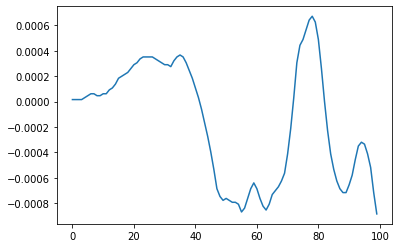

In [3]:
plt.plot(np.arange(100), y[:100])

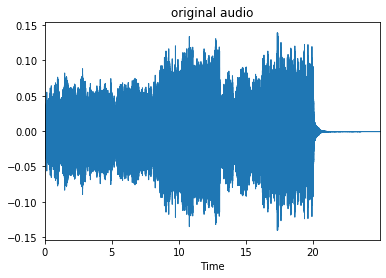

In [4]:
show_audio(y, sr)
plt.title('original audio')
plt.show()

play_audio(y, sr)

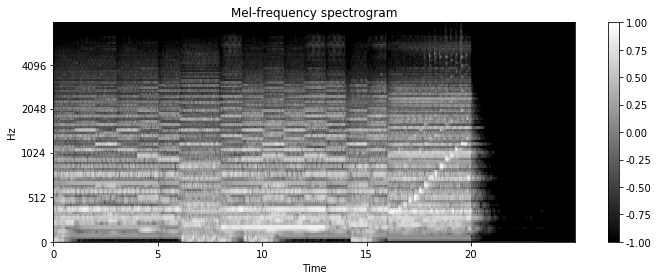

In [5]:
spectrogram = audio_to_spectrogram(y, sr, normalize=True)

show_spectrogram(spectrogram, sr)
plt.show()

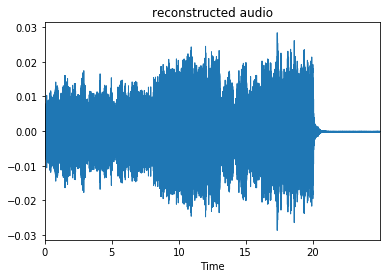

In [6]:
yp = spectrogram_to_audio(spectrogram, sr, normalize=True)
show_audio(yp, sr)
plt.title('reconstructed audio')
plt.show()
play_audio(yp, sr)

In [ ]:
y_noise = 0.3*np.sin(0.2 * np.arange(len(y)))

sy1 = audio_to_spectrogram(y, sr)
sy2 = audio_to_spectrogram(y_noise, sr)
sz = audio_to_spectrogram(y+y_noise, sr)
sz2 = add_spectrograms(sy1, sy2)

sy1re = subtract_spectrograms(sz2, sy2)


#     spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
#     spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
#     if normalize:
#         spectrogram = np.interp(spectrogram, (-80., 0.), (-1., +1.))


# spectrogram = librosa.db_to_power(spectrogram)
#     yp = librosa.feature.inverse.mel_to_audio(spectrogram, sr=sr)

play_audio(y+y_noise, sr)
# play_audio(spectrogram_to_audio(sz, sr), sr)

# play_audio(spectrogram_to_audio(sz2, sr), sr)
play_audio(spectrogram_to_audio(sy1re, sr), sr)


